# PROJET IA :  Human For You

Installation des Modules

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install python-graphviz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python-graphviz
ERROR: No matching distribution found for python-graphviz


Importation des jeux de données

Dans le but de pré-traiter nos données, nous allons lier nos différents jeux de données. Pour cela, nous devons d'abord les importer.

In [11]:
import pandas as pd
employeeSurveyData = pd.read_csv("employee_survey_data.csv")
generalData = pd.read_csv("general_data.csv")
managerSurveyData = pd.read_csv("manager_survey_data.csv")
inTime= pd.read_csv("in_time.csv")
outTime= pd.read_csv("out_time.csv")

Fusion des jeux de données en un seul

In [12]:
firstMerge = pd.merge(generalData, employeeSurveyData,on = ['EmployeeID'] , how='inner')
DataSet = pd.merge(firstMerge, managerSurveyData ,on = ['EmployeeID'] , how='inner')
DataSet.to_csv("totalDataSet.csv")
DataSet.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,6.0,2,6,1,5,2.0,1.0,3.0,3,3


Dans le but de prétraiter nos données, nous allons lier nos différents jeux de données. Pour cela, nous devons d'abord les importer

In [13]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

On observe que l'on a dans notre dataset des features qualitatives et quantitatives. Certaines des features ont aussi des valeurs manquantes.

Calcule de la moyenne pour in/out time

In [14]:
from datetime import datetime
from datetime import timedelta
workingHoursMean = pd.DataFrame(columns = ['EmployeeID', 'EntreeMoyenne', 'SortieMoyenne', 'TempsMoyen'])

for i in range(len(outTime)) :
    sortieSum = timedelta()
    entreeSum = timedelta()

    b = 0
    c = 0
    
    for row in outTime.iloc[i]:
        if type(row) is str:
            b += 1
            date_obj = datetime.strptime(row, '%Y-%m-%d %H:%M:%S')
            sortieSum = sortieSum + timedelta(
            seconds=date_obj.second,
            minutes=date_obj.minute,
            hours=date_obj.hour)

    for row in inTime.iloc[i]:
        if type(row) is str:
            c += 1
            date_obj = datetime.strptime(row, '%Y-%m-%d %H:%M:%S')
            entreeSum = entreeSum + timedelta(
            seconds=date_obj.second,
            minutes=date_obj.minute,
            hours=date_obj.hour)
            #Résultats final des moyenne d'heure d'entrée de sortie et du temps moyen passé
    
    moyenneEntree = entreeSum/c
    moyenneSortie = sortieSum/b
    tempsMoyen = (sortieSum/b)-(entreeSum/c)
    #print('entrée : ', entreeSum/c, ' - sortie : ', sortieSum/b, ' - temps moyen : ', (sortieSum/b)-(entreeSum/c))
    #row_moyenneEntree = [i, moyenneEntree]'
    workingHoursMean['EmployeeID'] = workingHoursMean['EmployeeID'].astype(int)
    workingHoursMean.loc[i] = [i+1, moyenneEntree.total_seconds()/3600  , moyenneSortie.total_seconds()/3600  , tempsMoyen.total_seconds()/3600 ]


Ajout du tableau des moyennes des horaires au jeu de données principal & suppression des attributs inutiles dans le jeu de données principal

In [15]:
workingHoursMean.head()

,EmployeeID,EntreeMoyenne,SortieMoyenne,TempsMoyen
0,1.0,10.001422,17.375073,7.373651
1,2.0,9.988073,17.707042,7.718969
2,3.0,10.025061,17.038301,7.013240
3,4.0,9.981830,17.175508,7.193678
4,5.0,9.998493,18.004668,8.006175


Ajout du tableau des moyennes des horaires au jeu de données principal & suppression des attributs inutiles dans le jeu de données principal

In [16]:
totalDataSet=DataSet.copy()
totalDataSet = pd.merge(totalDataSet, workingHoursMean ,on = ['EmployeeID'] , how='inner')
totalDataSet = totalDataSet.drop(['Over18','StandardHours', 'EmployeeID','EmployeeCount'], axis=1)
totalDataSet.to_csv("totaldata.csv")

Affichage & remplacement des valeurs manquantes

Transformation des variables ordinales.

In [17]:
qualiDataSet = totalDataSet[['PerformanceRating',
 'WorkLifeBalance', 'JobSatisfaction', 'EnvironmentSatisfaction', 
 'JobInvolvement', 'Education','JobLevel','StockOptionLevel','Attrition','Department',
 'BusinessTravel','EducationField','Gender','JobRole','MaritalStatus']]


qualiDataSet['PerformanceRating'] = qualiDataSet['PerformanceRating'].replace({ 1 : 'Faible', 2: 'Bon',3: 'Excellent',4: 'Au delà des attentes'})
qualiDataSet['WorkLifeBalance'] = qualiDataSet['WorkLifeBalance'].replace({ 1 : 'Mauvais', 2: 'Satisfaisant',3: 'Très satisfaisant',4: 'Excellent'})
qualiDataSet['JobSatisfaction'] = qualiDataSet['JobSatisfaction'].replace({ 1 : 'Mauvais', 2: 'Satisfaisant',3: 'Très satisfaisant',4: 'Excellent'})
qualiDataSet['EnvironmentSatisfaction'] = qualiDataSet['EnvironmentSatisfaction'].replace({ 1 : 'Faible', 2: 'Moyen',3: 'Élevé',4: 'Très élevé'})
qualiDataSet['JobInvolvement'] = qualiDataSet['JobInvolvement'].replace({ 1 : 'Faible', 2: 'Moyenne',3: 'Importante',4: 'Très importante'})
qualiDataSet['Education'] = qualiDataSet['Education'].replace({ 1 : 'Avant College', 2: 'College',3: 'Bachelor',4: 'Master',5: 'PhD'})
qualiDataSet['JobLevel'] = qualiDataSet['JobLevel'].replace({ 1 : 'Junior Employee', 2: 'Senior Employee',3: 'Manager',4: 'Senior Manager',5: 'Director'})
qualiDataSet['StockOptionLevel'] = qualiDataSet['StockOptionLevel'].replace({ 0 : 'Très Faible', 1 : 'Faible', 2: 'Moyen',3: 'Élevé'}) 

qualiDataSet

<ipython-input-17-149291d7d275>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualiDataSet['PerformanceRating'] = qualiDataSet['PerformanceRating'].replace({ 1 : 'Faible', 2: 'Bon',3: 'Excellent',4: 'Au delà des attentes'})
<ipython-input-17-149291d7d275>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualiDataSet['WorkLifeBalance'] = qualiDataSet['WorkLifeBalance'].replace({ 1 : 'Mauvais', 2: 'Satisfaisant',3: 'Très satisfaisant',4: 'Excellent'})
<ipython-input-17-149291d7d275>:9: SettingWithCopyWarni

,PerformanceRating,WorkLifeBalance,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement,Education,JobLevel,StockOptionLevel,Attrition,Department,BusinessTravel,EducationField,Gender,JobRole,MaritalStatus
0,Excellent,Satisfaisant,Excellent,Élevé,Importante,College,Junior Employee,Très Faible,No,Sales,Travel_Rarely,Life Sciences,Female,Healthcare Representative,Married
1,Au delà des attentes,Excellent,Satisfaisant,Élevé,Moyenne,Avant College,Junior Employee,Faible,Yes,Research & Development,Travel_Frequently,Life Sciences,Female,Research Scientist,Single
2,Excellent,Mauvais,Satisfaisant,Moyen,Importante,Master,Senior Manager,Élevé,No,Research & Development,Travel_Frequently,Other,Male,Sales Executive,Married
3,Excellent,Très satisfaisant,Excellent,Très élevé,Moyenne,PhD,Manager,Élevé,No,Research & Development,Non-Travel,Life Sciences,Male,Human Resources,Married
4,Excellent,Très satisfaisant,Mauvais,Très élevé,Importante,Avant College,Junior Employee,Moyen,No,Research & Development,Travel_Rarely,Medical,Male,Sales Executive,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Excellent,Très satisfaisant,Mauvais,Très élevé,Importante,Master,Junior Employee,Faible,No,Research & Development,Travel_Rarely,Medical,Female,Research Scientist,Single
4406,Excellent,Très satisfaisant,Excellent,Très élevé,Moyenne,Master,Junior Employee,Très Faible,No,Research & Development,Travel_Rarely,Medical,Male,Laboratory Technician,Divorced
4407,Au delà des attentes,Très satisfaisant,Très satisfaisant,Faible,Importante,College,Senior Employee,Très Faible,No,Research & Development,Travel_Rarely,Life Sciences,Male,Sales Executive,Married
4408,Excellent,Très satisfaisant,Mauvais,Très élevé,Moyenne,College,Junior Employee,Faible,No,Sales,Travel_Rarely,Medical,Male,Laboratory Technician,Divorced


L'interpretation des données ordinales est plus simple si on les remplace par des valeurs quantitative c'est donc ce que nous avons fait ici.

In [18]:
quantiDataSet = totalDataSet[['Age',
 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
 'YearsSinceLastPromotion','YearsWithCurrManager','EntreeMoyenne','SortieMoyenne','TempsMoyen']]
 
quantiDataSet

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EntreeMoyenne,SortieMoyenne,TempsMoyen
0,51,6,131160,1.0,11,1.0,6,1,0,0,10.001422,17.375073,7.373651
1,31,10,41890,0.0,23,6.0,3,5,1,4,9.988073,17.707042,7.718969
2,32,17,193280,1.0,15,5.0,2,5,0,3,10.025061,17.038301,7.013240
3,38,2,83210,3.0,11,13.0,5,8,7,5,9.981830,17.175508,7.193678
4,32,10,23420,4.0,12,9.0,2,6,0,4,9.998493,18.004668,8.006175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,60290,3.0,17,10.0,5,3,0,2,10.019790,18.542067,8.522277
4406,29,2,26790,2.0,15,10.0,2,3,0,2,10.004249,16.097203,6.092954
4407,25,25,37020,0.0,20,5.0,4,4,1,2,9.979974,17.686605,7.706632
4408,42,18,23980,0.0,14,10.0,2,9,7,8,10.018547,19.511141,9.492595


In [19]:
totalDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

Statistiques sur les variables numériques

In [20]:
quantiDataSet.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EntreeMoyenne,SortieMoyenne,TempsMoyen
count,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,65029.312925,2.694830,15.209524,11.279936,2.799320,7.008163,2.187755,4.123129,9.999966,17.700758,7.700792
std,9.133301,8.105026,47068.888559,2.498887,3.659108,7.782222,1.288978,6.125135,3.221699,3.567327,0.018142,1.340426,1.340218
min,18.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.937565,15.950612,5.950504
25%,30.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000,9.987833,16.664235,6.673333
50%,36.000000,7.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000,10.000213,17.408307,7.406761
75%,43.000000,14.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000,10.011729,18.361081,8.368703
max,60.000000,29.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000,10.077775,21.067266,11.030960


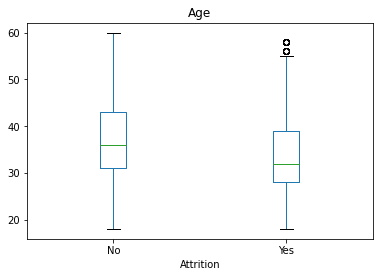

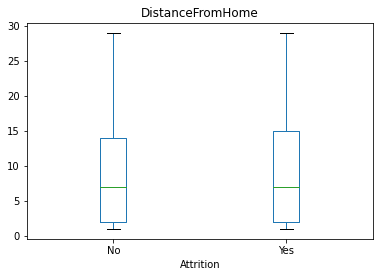

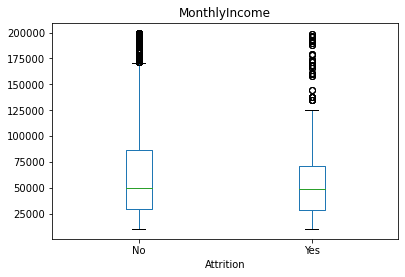

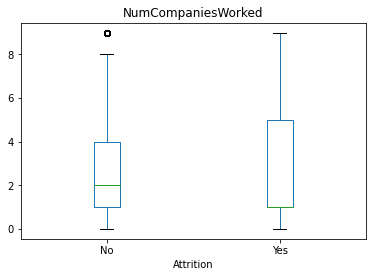

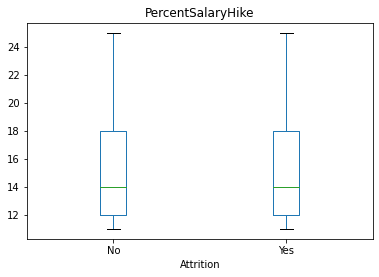

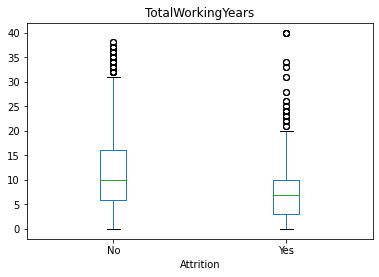

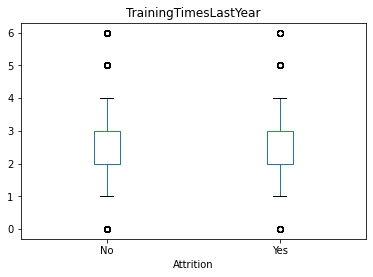

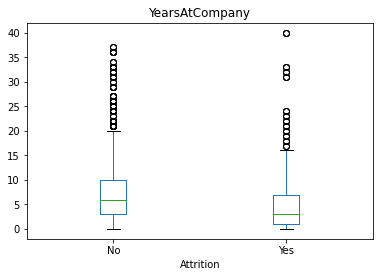

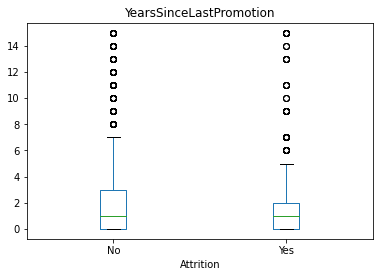

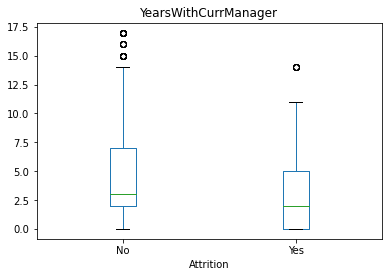

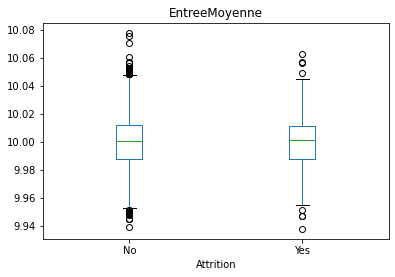

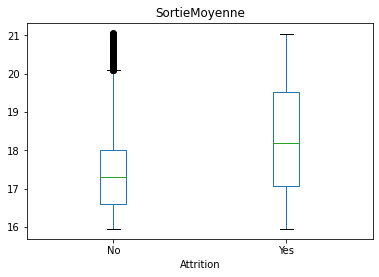

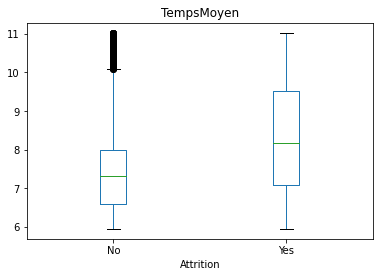

In [21]:
import matplotlib.pyplot as plt
import numpy as np



for name_column in quantiDataSet.select_dtypes(np.number).columns:
    totalDataSet.boxplot(by ='Attrition', column = name_column, grid = False, figsize=None) 
    plt.suptitle("")


#totalDataSet.value_counts('MonthlyIncome').plot(kind = 'pie')

Les boites a moustaches nous permette de voir les valeurs aberrantes et la dépendance entre l'Attrition et les autres features quantitatives

Analyse des valeurs qualitatives avec des histogrammes, matrice de correlation et khi2 

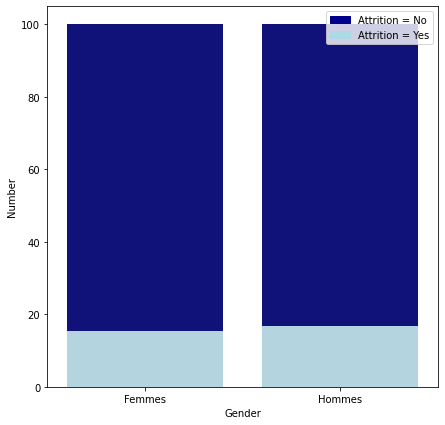

Gender       Femmes
Number    15.306122
Name: 0, dtype: object
Gender       Hommes
Number    16.666667
Name: 1, dtype: object


In [22]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(7, 7))


total = pd.DataFrame(columns = ['Gender', 'Number'])
total.loc[0] = ['Femmes',100 ]
total.loc[1] = ['Hommes', 100]

gender = pd.DataFrame(columns = ['Gender', 'Number'])
gender.loc[0] = ['Femmes',len(totalDataSet[(totalDataSet['Gender'] == "Female")  & (totalDataSet['Attrition'] == "Yes") ])/len(totalDataSet[(totalDataSet['Gender'] == "Female")])*100 ]
gender.loc[1] = ['Hommes', len(totalDataSet[(totalDataSet['Gender'] == "Male")  & (totalDataSet['Attrition'] == "Yes") ])/len(totalDataSet[(totalDataSet['Gender'] == "Male")])*100]


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="Gender",  y="Number", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="Gender", y="Number", data=gender, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Attrition = No')
bottom_bar = mpatches.Patch(color='lightblue', label='Attrition = Yes')
plt.legend(handles=[top_bar, bottom_bar])

#p show the graph
plt.show()#
print(gender.iloc[0])
print(gender.iloc[1])

#Il ne semble pas avoir de DEPENDENCE entre les attributs
#On peut se passer de l'attribut gender


Nous remarquons grâce à cette étude statistique, que le genre des personnes n'influencera pas notre intelligence artificielle, en plus d'être un attribut protégé pour des raisons éthiques, c'est pour cela que nous décidons de le retirer.

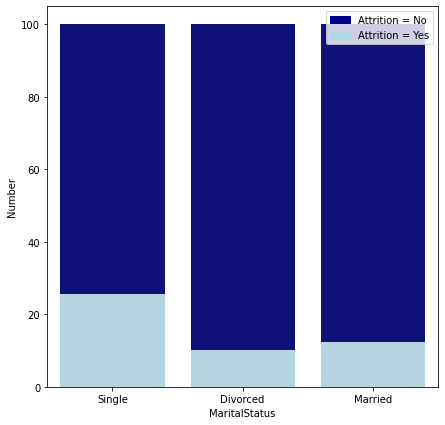

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(7, 7))


total = pd.DataFrame(columns = ['MaritalStatus', 'Number'])
total.loc[0] = ['Single',100 ]
total.loc[1] = ['Divorced',100]
total.loc[2] = ['Married',100]

maritalStatus = pd.DataFrame(columns = ['MaritalStatus', 'Number'])
maritalStatus.loc[0] = ['Single',len(totalDataSet[(totalDataSet['MaritalStatus'] == "Single")  & (totalDataSet['Attrition'] == "Yes") ])/len(totalDataSet[(totalDataSet['MaritalStatus'] == "Single")])*100 ]
maritalStatus.loc[1] = ['Divorced', len(totalDataSet[(totalDataSet['MaritalStatus'] == "Divorced")  & (totalDataSet['Attrition'] == "Yes") ])/len(totalDataSet[(totalDataSet['MaritalStatus'] == "Divorced")])*100]
maritalStatus.loc[2] = ['Married', len(totalDataSet[(totalDataSet['MaritalStatus'] == "Married")  & (totalDataSet['Attrition'] == "Yes") ])/len(totalDataSet[(totalDataSet['MaritalStatus'] == "Married")])*100]


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="MaritalStatus",  y="Number", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="MaritalStatus", y="Number", data=maritalStatus, color='lightblue')


# add legend
top_bar = mpatches.Patch(color='darkblue', label='Attrition = No')
bottom_bar = mpatches.Patch(color='lightblue', label='Attrition = Yes')
plt.legend(handles=[top_bar, bottom_bar])

#p show the graph
plt.show()


#Il semble y avoir une DEPENDENCE entre les attributs
#On peut se passer de l'attribut marital_status

En ce qui concerne le status marital, nous remarquons qu'il est dépendant de notre variable cible, néanmoins étant un attribut protégé par le code du travail.

<AxesSubplot:>

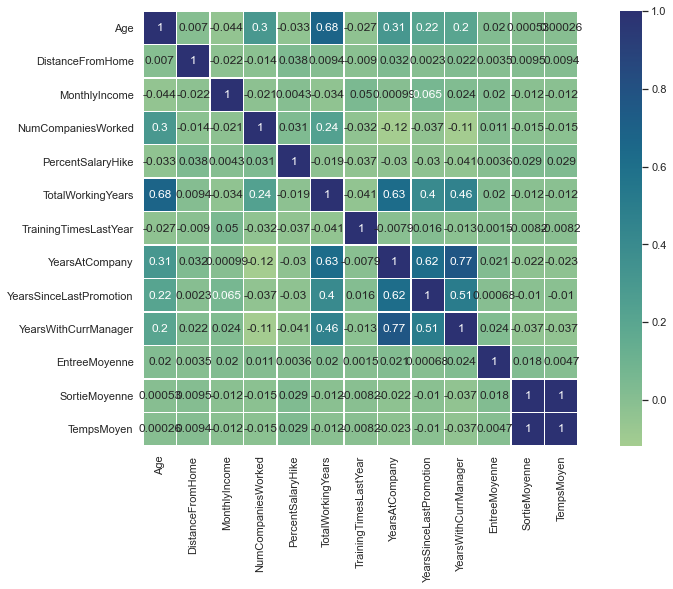

In [24]:
import seaborn as sns
cor = quantiDataSet.corr() 
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor, square = True, cmap="crest",linewidths=0.5,annot=True )

##CORRELATION TROP GRANDE A SUPPRIMER

Ci-dessus la matrice qui nous permet de voir les differentes correlations entre chaque features quntitatives. On remarque que Sortie Moyenne, Temps Moyen et Entrée Moyenne sont trop corrélées il faut les supprimer pour le dataset.

In [25]:
from scipy.stats import chi2_contingency

def chi2(attributs, cibleAttribut):
    cible = totalDataSet[cibleAttribut]
    for i in attributs:
        corrAttribut = totalDataSet[i]
        crossTable = pd.crosstab(corrAttribut,cible)
        chiVal, pVal, df,exp = chi2_contingency(crossTable)
        print(i, ' - pVal : ', pVal, ' - dépendance : ', (pVal < 0.05))

chi2(list(qualiDataSet.select_dtypes(include='object').columns.values), 'Attrition')

#pVal doit etre inférieur a 0.05

PerformanceRating  - pVal :  0.1342932423449371  - dépendance :  False
WorkLifeBalance  - pVal :  1.3208783070533684e-10  - dépendance :  True
JobSatisfaction  - pVal :  3.298455638541961e-11  - dépendance :  True
EnvironmentSatisfaction  - pVal :  4.5288923374665606e-14  - dépendance :  True
JobInvolvement  - pVal :  0.04322252837372166  - dépendance :  True
Education  - pVal :  0.22759826301782393  - dépendance :  False
JobLevel  - pVal :  0.1799276801337186  - dépendance :  False
StockOptionLevel  - pVal :  0.38454683657380506  - dépendance :  False
Attrition  - pVal :  0.0  - dépendance :  True
Department  - pVal :  4.820888218170407e-07  - dépendance :  True
BusinessTravel  - pVal :  1.764276972983189e-16  - dépendance :  True
EducationField  - pVal :  8.288917469574179e-09  - dépendance :  True
Gender  - pVal :  0.24529482862926827  - dépendance :  False
JobRole  - pVal :  0.0014855447448152669  - dépendance :  True
MaritalStatus  - pVal :  8.45385940605786e-31  - dépendance :  T

Grâce au test de Chi², nous pouvons définir les dépendances entre les attributs qualitatives, donc remarquer que PerformanceRating, Education, JobLevel,StockOptionLevel, Gender ne sont pas dépendants de notre varible cible, soit l'Attrition

Analyse des variables quantitatives avec Anova

In [26]:
import statsmodels.formula.api; 
import statsmodels.api; 

def testAnova(attributList):
    for i in attributList:
        fit = statsmodels.formula.api.ols(i + ' ~ Attrition', data = totalDataSet).fit()
        table = statsmodels.api.stats.anova_lm(fit)
        print(i, ' - F : ', table.iloc[0]['F'], ' - pValue : ',table.iloc[0]['PR(>F)'], ' - dépendance : ',(table.iloc[0]['PR(>F)'] < 0.05))

testAnova(quantiDataSet)


Age  - F :  114.6316818590912  - pValue :  1.99680161588347e-26  - dépendance :  True
DistanceFromHome  - F :  0.4173697538460141  - pValue :  0.5182860428065224  - dépendance :  False
MonthlyIncome  - F :  4.288570383801483  - pValue :  0.038427484905952394  - dépendance :  True
NumCompaniesWorked  - F :  7.884212755837602  - pValue :  0.0050088441899783275  - dépendance :  True
PercentSalaryHike  - F :  4.670236608422257  - pValue :  0.030743386433341374  - dépendance :  True
TotalWorkingYears  - F :  131.45193284104016  - pValue :  5.2412468106534875e-30  - dépendance :  True
TrainingTimesLastYear  - F :  10.796807998328628  - pValue :  0.0010247061915349563  - dépendance :  True
YearsAtCompany  - F :  81.0784451957218  - pValue :  3.16388312248436e-19  - dépendance :  True
YearsSinceLastPromotion  - F :  4.811020933642705  - pValue :  0.02833033618936241  - dépendance :  True
YearsWithCurrManager  - F :  110.2369679679062  - pValue :  1.7339322652874626e-25  - dépendance :  True
En

Grâce au test de Anova, nous pouvons définir les dépendances entre les attributs qualitatives et quantitatives.
Donc remarquer, que DistanceFromHome  , EntreeMoyenne ne sont pas dépendant de notre varible cible, soit l'Attrition.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>],
       [<AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'WorkLifeBalance'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
    

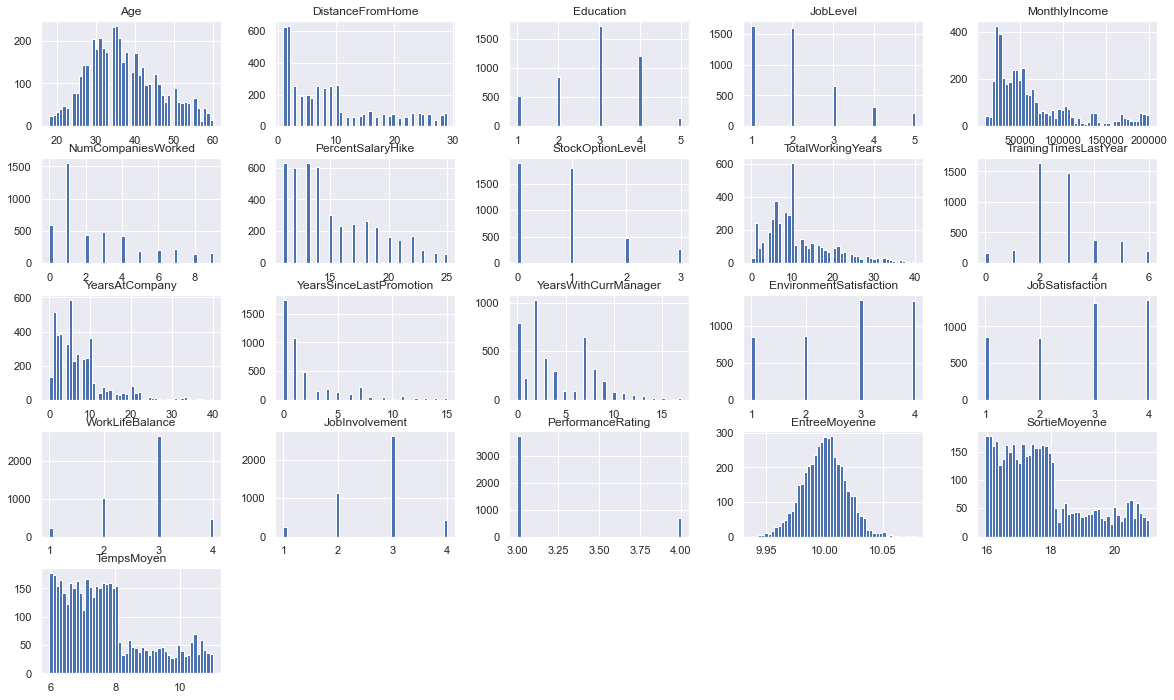

In [27]:
totalDataSet.hist(bins= 50, figsize = (20,12))



In [28]:
totalDataSet.isnull().sum().sort_values(ascending=False)[:50] #on affiche les valeurs nulles

WorkLifeBalance            38
EnvironmentSatisfaction    25
JobSatisfaction            20
NumCompaniesWorked         19
TotalWorkingYears           9
Age                         0
SortieMoyenne               0
EntreeMoyenne               0
PerformanceRating           0
JobInvolvement              0
YearsWithCurrManager        0
YearsSinceLastPromotion     0
YearsAtCompany              0
TrainingTimesLastYear       0
StockOptionLevel            0
Attrition                   0
PercentSalaryHike           0
MonthlyIncome               0
MaritalStatus               0
JobRole                     0
JobLevel                    0
Gender                      0
EducationField              0
Education                   0
DistanceFromHome            0
Department                  0
BusinessTravel              0
TempsMoyen                  0
dtype: int64

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])




In [30]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

dataset_num = totalDataSet.select_dtypes(include = [np.number])
num_attribs = list(dataset_num)
cat_attribs = ["BusinessTravel","Department","EducationField", "JobRole","MaritalStatus"]
bin_attribs = ["Attrition","Gender"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("cat_binary",OrdinalEncoder(),bin_attribs),
    ])

dataset_prepared = full_pipeline.fit_transform(totalDataSet)



In [31]:

dataframe_prepared = pd.DataFrame(dataset_prepared)
ordered_subcat = num_attribs.copy()
for cat in cat_attribs:
    for subcat in sorted(totalDataSet[cat].unique()):
        if subcat in ordered_subcat:
            print(cat + "_" + subcat)
            ordered_subcat.append(cat + "_" + subcat)
        else:
            ordered_subcat.append(subcat)
for attrib in bin_attribs:
    ordered_subcat.append(attrib)

dataframe_prepared.columns = ordered_subcat

#for bin in bin_attribs:
 #   dataframe_prepared[bin] = dataframe_prepared[bin].astype(int)

#for cat in cat_attribs:
 #   for subcat in sorted(totalDataSet[cat].unique()):
  #      dataframe_prepared[subcat] = dataframe_prepared[subcat].astype(int)
    

    

dataframe_prepared.info()

EducationField_Human Resources
JobRole_Human Resources
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             4410 non-null   float64
 1   DistanceFromHome                4410 non-null   float64
 2   Education                       4410 non-null   float64
 3   JobLevel                        4410 non-null   float64
 4   MonthlyIncome                   4410 non-null   float64
 5   NumCompaniesWorked              4410 non-null   float64
 6   PercentSalaryHike               4410 non-null   float64
 7   StockOptionLevel                4410 non-null   float64
 8   TotalWorkingYears               4410 non-null   float64
 9   TrainingTimesLastYear           4410 non-null   float64
 10  YearsAtCompany                  4410 non-null   float64
 11  YearsSinceLastPromotion         4410 non

In [32]:
pd.set_option('max_columns', None)
dataframe_prepared.head(30)

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,EntreeMoyenne,SortieMoyenne,TempsMoyen,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,EducationField_Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Healthcare Representative,JobRole_Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,Attrition,Gender
0,1.541369,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,0.252200,1.156302,-1.085336,0.379672,-0.426230,0.080275,-0.242999,-0.244123,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.648668,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,0.252200,-0.663899,1.757749,-1.026167,2.346151,-0.655619,0.004689,0.013564,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.539166,0.963398,1.061787,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,-0.665460,-0.663899,-2.506879,0.379672,-0.426230,1.383378,-0.494270,-0.513073,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.117845,-0.887515,2.038524,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,1.707500,0.161947,1.493867,0.245834,1.169861,1.156302,0.336206,-1.026167,-0.426230,-0.999797,-0.391897,-0.378424,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.539166,0.099639,-1.868426,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,1.169861,-1.573999,0.336206,0.379672,-0.426230,-0.081202,0.226752,0.227886,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.993860,-0.147150,0.085049,1.749610,-0.516733,0.123580,-0.603911,-0.932014,2.151212,1.707500,-0.001333,1.493867,0.806541,0.252200,-0.663899,-1.085336,0.379672,-0.426230,-0.605872,2.301257,2.309815,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,-0.977174,0.223033,-0.891688,-0.057788,-0.146596,-0.277442,1.309341,0.241988,-0.807517,-0.620189,-1.144294,-0.679146,-1.155935,-1.583120,0.246202,-2.506879,0.379672,2.346151,-1.970665,-0.606570,-0.579987,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
7,-0.867672,1.086793,0.085049,-0.057788,-0.713914,-0.277442,1.855984,2.589994,-0.164315,-0.620189,-1.144294,-0.679146,-1.155935,-1.583120,-0.663899,0.336206,0.379672,2.346151,0.151778,-0.725537,-0.727704,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,-0.648668,-1.010909,0.085049,0.845911,-0.947428,-1.079486,1.582663,-0.932014,-0.164315,-0.620189,0.325228,1.493867,1.086895,-0.665460,1.156302,0.336206,0.379672,2.346151,1.243274,-0.329589,-0.346470,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,-1.305679,-0.270544,1.061787,1.749610,1.479078,-0.678464,-0.603911,0.241988,-0.678877,-0.620189,-0.164613,-0.368715,0.245834,-0.665460,-1.573999,0.336206,0.379672,-0.426230,-1.949421,-0.489502,-0.463189,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
totalDataSet.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,EntreeMoyenne,SortieMoyenne,TempsMoyen
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,10.001422,17.375073,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,9.988073,17.707042,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,10.025061,17.038301,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,9.981830,17.175508,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,9.998493,18.004668,8.006175


In [34]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#corrMatrix = dataframe_prepared.corr()
#print (corrMatrix)

#corr = corrMatrix.values

In [35]:
dataframe_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             4410 non-null   float64
 1   DistanceFromHome                4410 non-null   float64
 2   Education                       4410 non-null   float64
 3   JobLevel                        4410 non-null   float64
 4   MonthlyIncome                   4410 non-null   float64
 5   NumCompaniesWorked              4410 non-null   float64
 6   PercentSalaryHike               4410 non-null   float64
 7   StockOptionLevel                4410 non-null   float64
 8   TotalWorkingYears               4410 non-null   float64
 9   TrainingTimesLastYear           4410 non-null   float64
 10  YearsAtCompany                  4410 non-null   float64
 11  YearsSinceLastPromotion         4410 non-null   float64
 12  YearsWithCurrManager            44

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             4410 non-null   float64
 1   DistanceFromHome                4410 non-null   float64
 2   Education                       4410 non-null   float64
 3   JobLevel                        4410 non-null   float64
 4   MonthlyIncome                   4410 non-null   float64
 5   NumCompaniesWorked              4410 non-null   float64
 6   PercentSalaryHike               4410 non-null   float64
 7   StockOptionLevel                4410 non-null   float64
 8   TotalWorkingYears               4410 non-null   float64
 9   TrainingTimesLastYear           4410 non-null   float64
 10  YearsAtCompany                  4410 non-null   float64
 11  YearsSinceLastPromotion         4410 non-null   float64
 12  YearsWithCurrManager            44

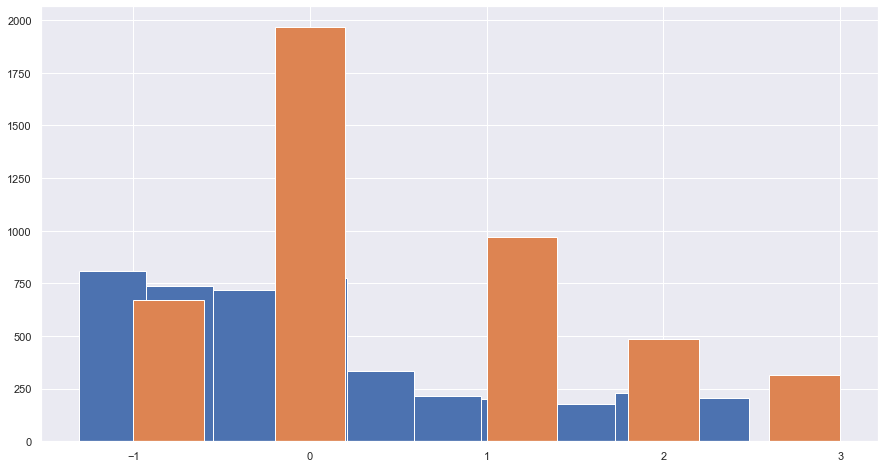

In [36]:
#stratification

dataframe_prepared["TempsMoyenCat"] = np.ceil(dataframe_prepared["TempsMoyen"])
#dataframe_prepared["TempsMoyenCat"].where(dataframe_prepared["TempsMoyenCat"] < 2, 2.0, inplace=True) # replace where false
dataframe_prepared["TempsMoyen"].hist()
dataframe_prepared["TempsMoyenCat"].hist()


cleanedDataSet = dataframe_prepared.copy()
cleanedDataSet = cleanedDataSet.drop(['Gender','Divorced','Single','Married','SortieMoyenne','EntreeMoyenne'], axis=1)  #Ethique
cleanedDataSet.info()


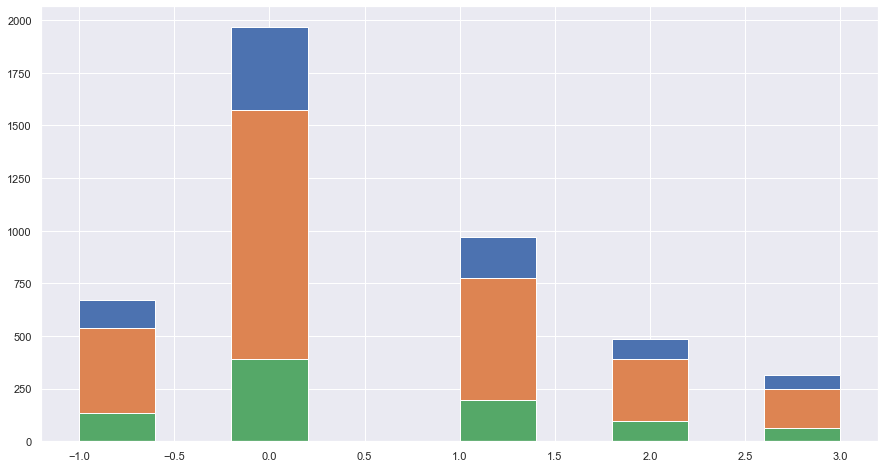

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cleanedDataSet, cleanedDataSet["TempsMoyenCat"]):
    strat_train_set = cleanedDataSet.loc[train_index]
    strat_test_set = cleanedDataSet.loc[test_index]
    


    cleanedDataSet["TempsMoyenCat"].hist()
    strat_train_set["TempsMoyenCat"].hist()
    strat_test_set["TempsMoyenCat"].hist()


In [38]:
X_cleanedDataSet = strat_train_set.drop(['Attrition'], axis=1) 
Y_cleanedDataSet = strat_train_set['Attrition'].copy()
Y_cleanedDataSet = Y_cleanedDataSet.replace({ 'No' : False, 'Yes' : True})



In [39]:
X_cleanedTestDataSet = strat_test_set.drop(['Attrition'], axis=1) 
Y_cleanedTestDataSet = strat_test_set['Attrition'].copy()
Y_cleanedTestDataSet = Y_cleanedDataSet.replace({ 'No' : False, 'Yes' : True})

In [40]:
X_cleanedDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 1142 to 286
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             3528 non-null   float64
 1   DistanceFromHome                3528 non-null   float64
 2   Education                       3528 non-null   float64
 3   JobLevel                        3528 non-null   float64
 4   MonthlyIncome                   3528 non-null   float64
 5   NumCompaniesWorked              3528 non-null   float64
 6   PercentSalaryHike               3528 non-null   float64
 7   StockOptionLevel                3528 non-null   float64
 8   TotalWorkingYears               3528 non-null   float64
 9   TrainingTimesLastYear           3528 non-null   float64
 10  YearsAtCompany                  3528 non-null   float64
 11  YearsSinceLastPromotion         3528 non-null   float64
 12  YearsWithCurrManager            

In [41]:
print('BusinessTravel :' , totalDataSet['BusinessTravel'].value_counts())
print('JobLevel :' , totalDataSet['JobLevel'].value_counts())
print('JobRole :' , totalDataSet['JobRole'].value_counts())
print('Department :' , totalDataSet['Department'].value_counts())
print('EducationField :' , totalDataSet['EducationField'].value_counts())

BusinessTravel : Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
JobLevel : 1    1629
2    1602
3     654
4     318
5     207
Name: JobLevel, dtype: int64
JobRole : Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64
Department : Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
EducationField : Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64


In [42]:
import statsmodels.api as sm

logitFrame = X_cleanedDataSet.copy()
logitFrame = logitFrame.drop(['Non-Travel','Human Resources','EducationField_Human Resources'], axis= 1)
logit_model=sm.Logit(Y_cleanedDataSet,logitFrame)
result=logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.353217
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.204      
Dependent Variable:    Attrition          AIC:                2568.2975  
Date:                  2022-03-18 09:14   BIC:                2802.7000  
No. Observations:      3528               Log-Likelihood:     -1246.1    
Df Model:              37                 LL-Null:            -1565.2    
Df Residuals:          3490               LLR p-value:        1.2622e-110
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        7.0000                                            
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Age                       -0.3632   0.07

Optimization terminated successfully.
         Current function value: 0.360820
         Iterations 7


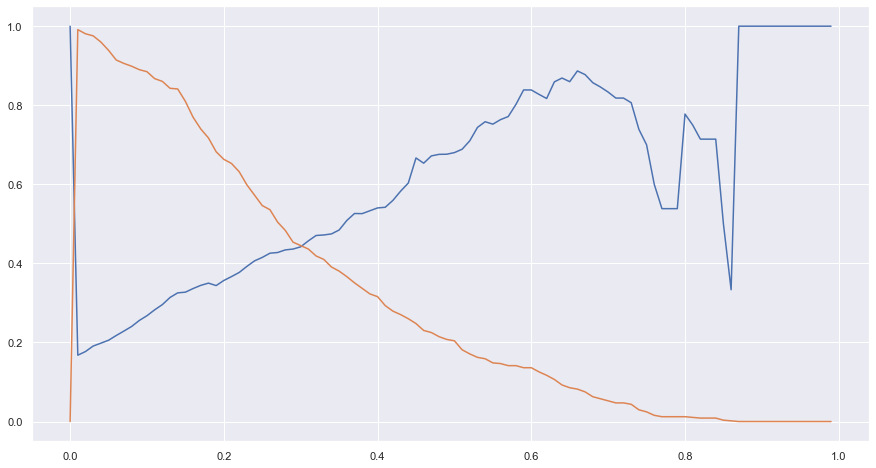

In [43]:
from pylab import *


logitFrame = logitFrame[['NumCompaniesWorked','TotalWorkingYears','TrainingTimesLastYear','YearsSinceLastPromotion',
'YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','TempsMoyen','Travel_Frequently','Travel_Rarely',
'Research & Development','Sales','Marketing','Healthcare Representative','JobRole_Human Resources','Laboratory Technician',
'Manager','Manufacturing Director','Research Director','Research Scientist','Sales Executive','Sales Representative']]

def filtre(data):
    return data[['NumCompaniesWorked','TotalWorkingYears','TrainingTimesLastYear','YearsSinceLastPromotion',
    'YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','TempsMoyen','Travel_Frequently','Travel_Rarely',
    'Research & Development','Sales','Marketing','Healthcare Representative','JobRole_Human Resources','Laboratory Technician',
    'Manager','Manufacturing Director','Research Director','Research Scientist','Sales Executive','Sales Representative']]


logit_model = sm.Logit(Y_cleanedDataSet,logitFrame)
result = logit_model.fit()
#print(result.summary2())
y_pred = result.predict(logitFrame)
y_some_digit_pred = (y_pred > 0.5)
y_some_digit_pred.head()



def precision_recall(y_some_digit_pred):
    FP = 0
    FN = 0  
    VP = 0
    VN = 0
    for i in range(len(y_some_digit_pred)):
        if (y_some_digit_pred.iloc[i] == 1)  & (Y_cleanedDataSet.iloc[i] == 1):
            VP +=1
        if (y_some_digit_pred.iloc[i] == 0)  & (Y_cleanedDataSet.iloc[i] == 0):
            VN +=1
        if (y_some_digit_pred.iloc[i] == 1)  & (Y_cleanedDataSet.iloc[i] == 0):
            FP +=1
        if (y_some_digit_pred.iloc[i] == 0)  & (Y_cleanedDataSet.iloc[i] == 1):
            FN +=1

    if VP == 0 : return 1,0
    if FN == 0 : return 1,0
    precision= VP/(VP+FP)
    recall = VP/(VP+FN)
#    TPR = VP/(VP+FN)
#    FPR = FP/(VN+FN)

    return precision, recall

x = [ i/100 for i in range(100)]
precision_curve = []
recall_curve = []

for i in x :
    y_some_digit_pred = (y_pred > i)
    precision_curve.append(precision_recall(y_some_digit_pred)[0])
    recall_curve.append(precision_recall(y_some_digit_pred)[1])

plot(x, precision_curve)
plot(x, recall_curve)




#x = np.array([1, 3, 4, 6])
#y = np.array([2, 3, 5, 1])
#plt.plot(x, y)

#print(result)

Etant donné que statsmodel ne présente aucun outil pour pousser l'analyse du modèle tel que cross validation, courbe roc et AUC, et qu'il est très difficile à notre niveau de tout reproduire manuellement, nous avons choisi de continuer avec sklearn en y insérant seulement les attributs qui avaient un pValue < 5% dans l'entrainement du modèle. 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


logistic_reg = LogisticRegression()
logistic_reg.fit(logitFrame,Y_cleanedDataSet)
logistic_reg_pred = logistic_reg.predict(logitFrame)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

logistic_reg_scores = cross_val_score(logistic_reg, logitFrame, 
                                      Y_cleanedDataSet, cv=7, scoring="f1")

display_scores(logistic_reg_scores)



Scores: [0.33962264 0.27722772 0.3364486  0.25490196 0.27184466 0.32
 0.24528302]
Mean: 0.29218980032270936
Standard deviation: 0.036273840294388945


In [45]:
from sklearn.model_selection import GridSearchCV

logistic_reg_param_grid = [
    {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'penalty': ['none', 'l1', 'l2', 'elasticnet'], 
     'C': [1, 10, 100, 1000]} #https://scikit-learn.org/stable/modules/grid_search.html
  ]

grid_search = GridSearchCV(logistic_reg, logistic_reg_param_grid, cv=7,
                           scoring='f1', return_train_score=True)
grid_search.fit(X_cleanedDataSet, Y_cleanedDataSet)


C:\Users\Gunut\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gunut\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gunut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Gunut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Gunut\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sc

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='f1')

In [46]:
grid_search.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [47]:
best_logistic_reg = grid_search.best_estimator_

In [48]:
best_logistic_reg_score = cross_val_score(best_logistic_reg, X_cleanedDataSet, 
                                          Y_cleanedDataSet, cv=7, scoring="f1")

display_scores(best_logistic_reg_score)

Scores: [0.36363636 0.3963964  0.33928571 0.28037383 0.27027027 0.35849057
 0.37606838]
Mean: 0.34064593121007963
Standard deviation: 0.04439621083659808


In [49]:
# Matrice de Confusion

from sklearn.model_selection import cross_val_predict

dataset_train_label_true = (Y_cleanedDataSet == 1)

best_logistic_reg_pred = cross_val_predict(best_logistic_reg, X_cleanedDataSet, dataset_train_label_true, cv=7)

In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(dataset_train_label_true, best_logistic_reg_pred)

array([[2886,   69],
       [ 441,  132]], dtype=int64)

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(dataset_train_label_true, best_logistic_reg_pred)

0.6567164179104478

In [52]:
recall_score(dataset_train_label_true, best_logistic_reg_pred)

0.23036649214659685

In [53]:
f1_score(dataset_train_label_true, best_logistic_reg_pred)

0.34108527131782945

In [54]:
y_scores = cross_val_predict(best_logistic_reg, X_cleanedDataSet, dataset_train_label_true, cv=7,
                             method="decision_function")


In [55]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(dataset_train_label_true, y_scores)

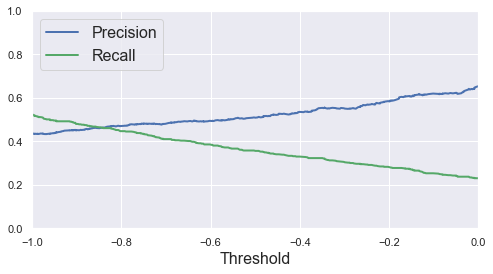

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1, 0])
plt.show()

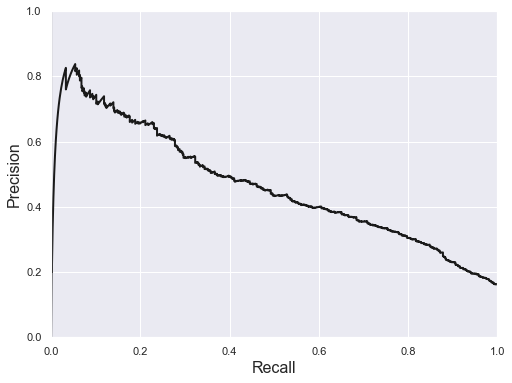

In [57]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [58]:
from numpy import argmax
from sklearn.metrics import f1_score

fscore = f1_score(dataset_train_label_true, best_logistic_reg_pred)
ix = argmax(fscore)
#print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
logisitc_reg_thresholds = thresholds[ix]

In [59]:
dataset_train_pred_pvr = (y_scores > logisitc_reg_thresholds)

precision_score(dataset_train_label_true, dataset_train_pred_pvr), recall_score(dataset_train_label_true, dataset_train_pred_pvr), f1_score(dataset_train_label_true, dataset_train_pred_pvr)

(0.16240772288472458, 0.9982547993019197, 0.27936507936507937)

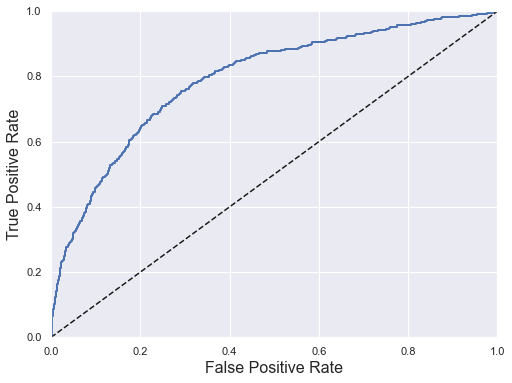

In [60]:
#Roc
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(dataset_train_label_true, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(dataset_train_label_true, y_scores)

0.791846871188833

Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)
y_probas_forest = cross_val_predict(forest_clf, logitFrame, dataset_train_label_true, cv=7,
                                    method="predict")

In [63]:
precision_score(dataset_train_label_true, y_probas_forest)

0.9775510204081632

In [64]:
recall_score(dataset_train_label_true, y_probas_forest)

0.8359511343804538

In [65]:
f1_score(dataset_train_label_true, y_probas_forest)

0.9012229539040452

In [66]:
forest_score = cross_val_score(forest_clf, logitFrame, dataset_train_label_true, cv=7, scoring="f1")
display_scores(forest_score)

Scores: [0.88275862 0.94936709 0.90909091 0.90666667 0.86666667 0.89333333
 0.8974359 ]
Mean: 0.9007598832129606
Standard deviation: 0.023962923416604446


In [67]:
#Paramétrage du modèle (fine tuning)
forest_clf_param_grid = [
    {'n_estimators' : [50, 100, 200, 300],
    'max_depth' : [10, 20, 40, 50]}
  ]

grid_search = GridSearchCV(forest_clf, forest_clf_param_grid, cv=7,
                           scoring='f1', return_train_score=True)
grid_search.fit(logitFrame, Y_cleanedDataSet)

GridSearchCV(cv=7,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             param_grid=[{'max_depth': [10, 20, 40, 50],
                          'n_estimators': [50, 100, 200, 300]}],
             return_train_score=True, scoring='f1')

In [68]:
grid_search.best_params_

{'max_depth': 40, 'n_estimators': 300}

In [69]:
best_forest_clf = grid_search.best_estimator_

In [70]:
best_forest_clf_score = cross_val_score(best_forest_clf, logitFrame, 
                                          Y_cleanedDataSet, cv=7, scoring="f1")

display_scores(best_forest_clf_score)

Scores: [0.92810458 0.975      0.94936709 0.93506494 0.91503268 0.96202532
 0.9625    ]
Mean: 0.9467277992900268
Standard deviation: 0.019915847996513626


In [71]:
#matrice de confusion
best_forest_clf_pred = cross_val_predict(best_forest_clf, logitFrame, dataset_train_label_true, cv=7)

In [72]:
confusion_matrix(dataset_train_label_true, best_forest_clf_pred)

array([[2951,    4],
       [  54,  519]], dtype=int64)

In [73]:
precision_score(dataset_train_label_true, best_forest_clf_pred)

0.9923518164435946

In [74]:
recall_score(dataset_train_label_true, best_forest_clf_pred)

0.9057591623036649

In [75]:
f1_score(dataset_train_label_true, best_forest_clf_pred)

0.9470802919708028

In [76]:
#Recall et precision en fonction du seuil
y_scores_forest_clf = cross_val_predict(best_forest_clf, logitFrame, dataset_train_label_true, cv=7,
                             method="predict_proba")
y_scores_forest_clf = y_scores_forest_clf[:,1]

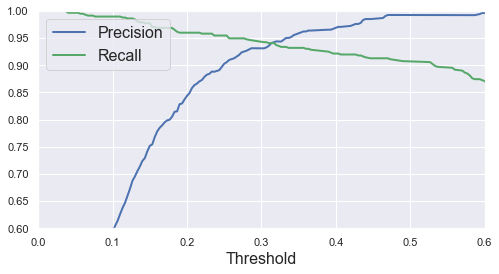

In [77]:
precisions, recalls, thresholds = precision_recall_curve(dataset_train_label_true, y_scores_forest_clf)

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 0.6])
plt.ylim([0.6, 1])
plt.show()

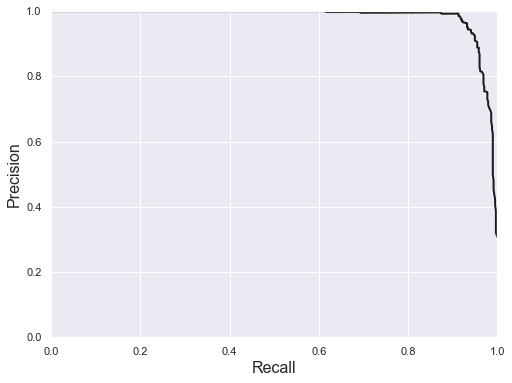

In [78]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [79]:
fscore = (2 * precisions * recalls) / (precisions + recalls)
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
forest_thresholds = thresholds[ix]

Best Threshold=0.470000, F-Score=0.951


In [80]:
dataset_train_pred_pvr = (y_scores_forest_clf > thresholds[ix])

precision_score(dataset_train_label_true, dataset_train_pred_pvr), recall_score(dataset_train_label_true, dataset_train_pred_pvr), f1_score(dataset_train_label_true, dataset_train_pred_pvr)

(0.9923954372623575, 0.9109947643979057, 0.9499545040946316)

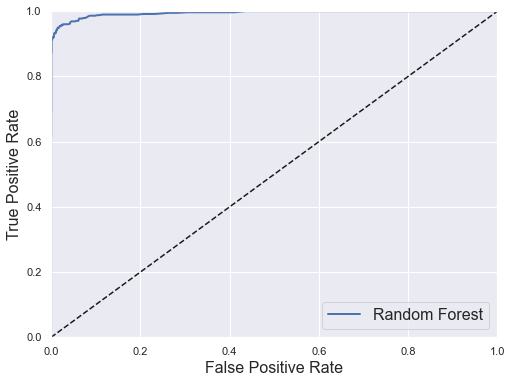

In [81]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(dataset_train_label_true, y_scores_forest_clf)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(dataset_train_label_true, y_scores_forest_clf)

0.9940804918453946

Decision Tree


In [83]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10, random_state = 0)
clf.fit(X_cleanedDataSet, Y_cleanedDataSet)
clf.predict(X_cleanedDataSet)


array([0., 0., 0., ..., 1., 0., 0.])

[Text(1126.384129213483, 1660.4509090909091, 'TempsMoyen <= 0.355\ngini = 0.272\nsamples = 3528\nvalue = [2955, 573]'),
 Text(499.0259831460674, 1502.3127272727272, 'TotalWorkingYears <= -1.129\ngini = 0.193\nsamples = 2601\nvalue = [2319, 282]'),
 Text(181.03651685393257, 1344.1745454545455, 'JobLevel <= -0.51\ngini = 0.435\nsamples = 216\nvalue = [147, 69]'),
 Text(56.42696629213483, 1186.0363636363636, 'Manager <= 0.5\ngini = 0.221\nsamples = 79\nvalue = [69, 10]'),
 Text(43.8876404494382, 1027.898181818182, 'TempsMoyen <= -1.236\ngini = 0.167\nsamples = 76\nvalue = [69, 7]'),
 Text(31.34831460674157, 869.76, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(56.42696629213483, 869.76, 'Age <= -1.908\ngini = 0.126\nsamples = 74\nvalue = [69, 5]'),
 Text(25.078651685393258, 711.6218181818183, 'Sales Executive <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(12.539325842696629, 553.4836363636364, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(37.61797752808989, 553.483636363

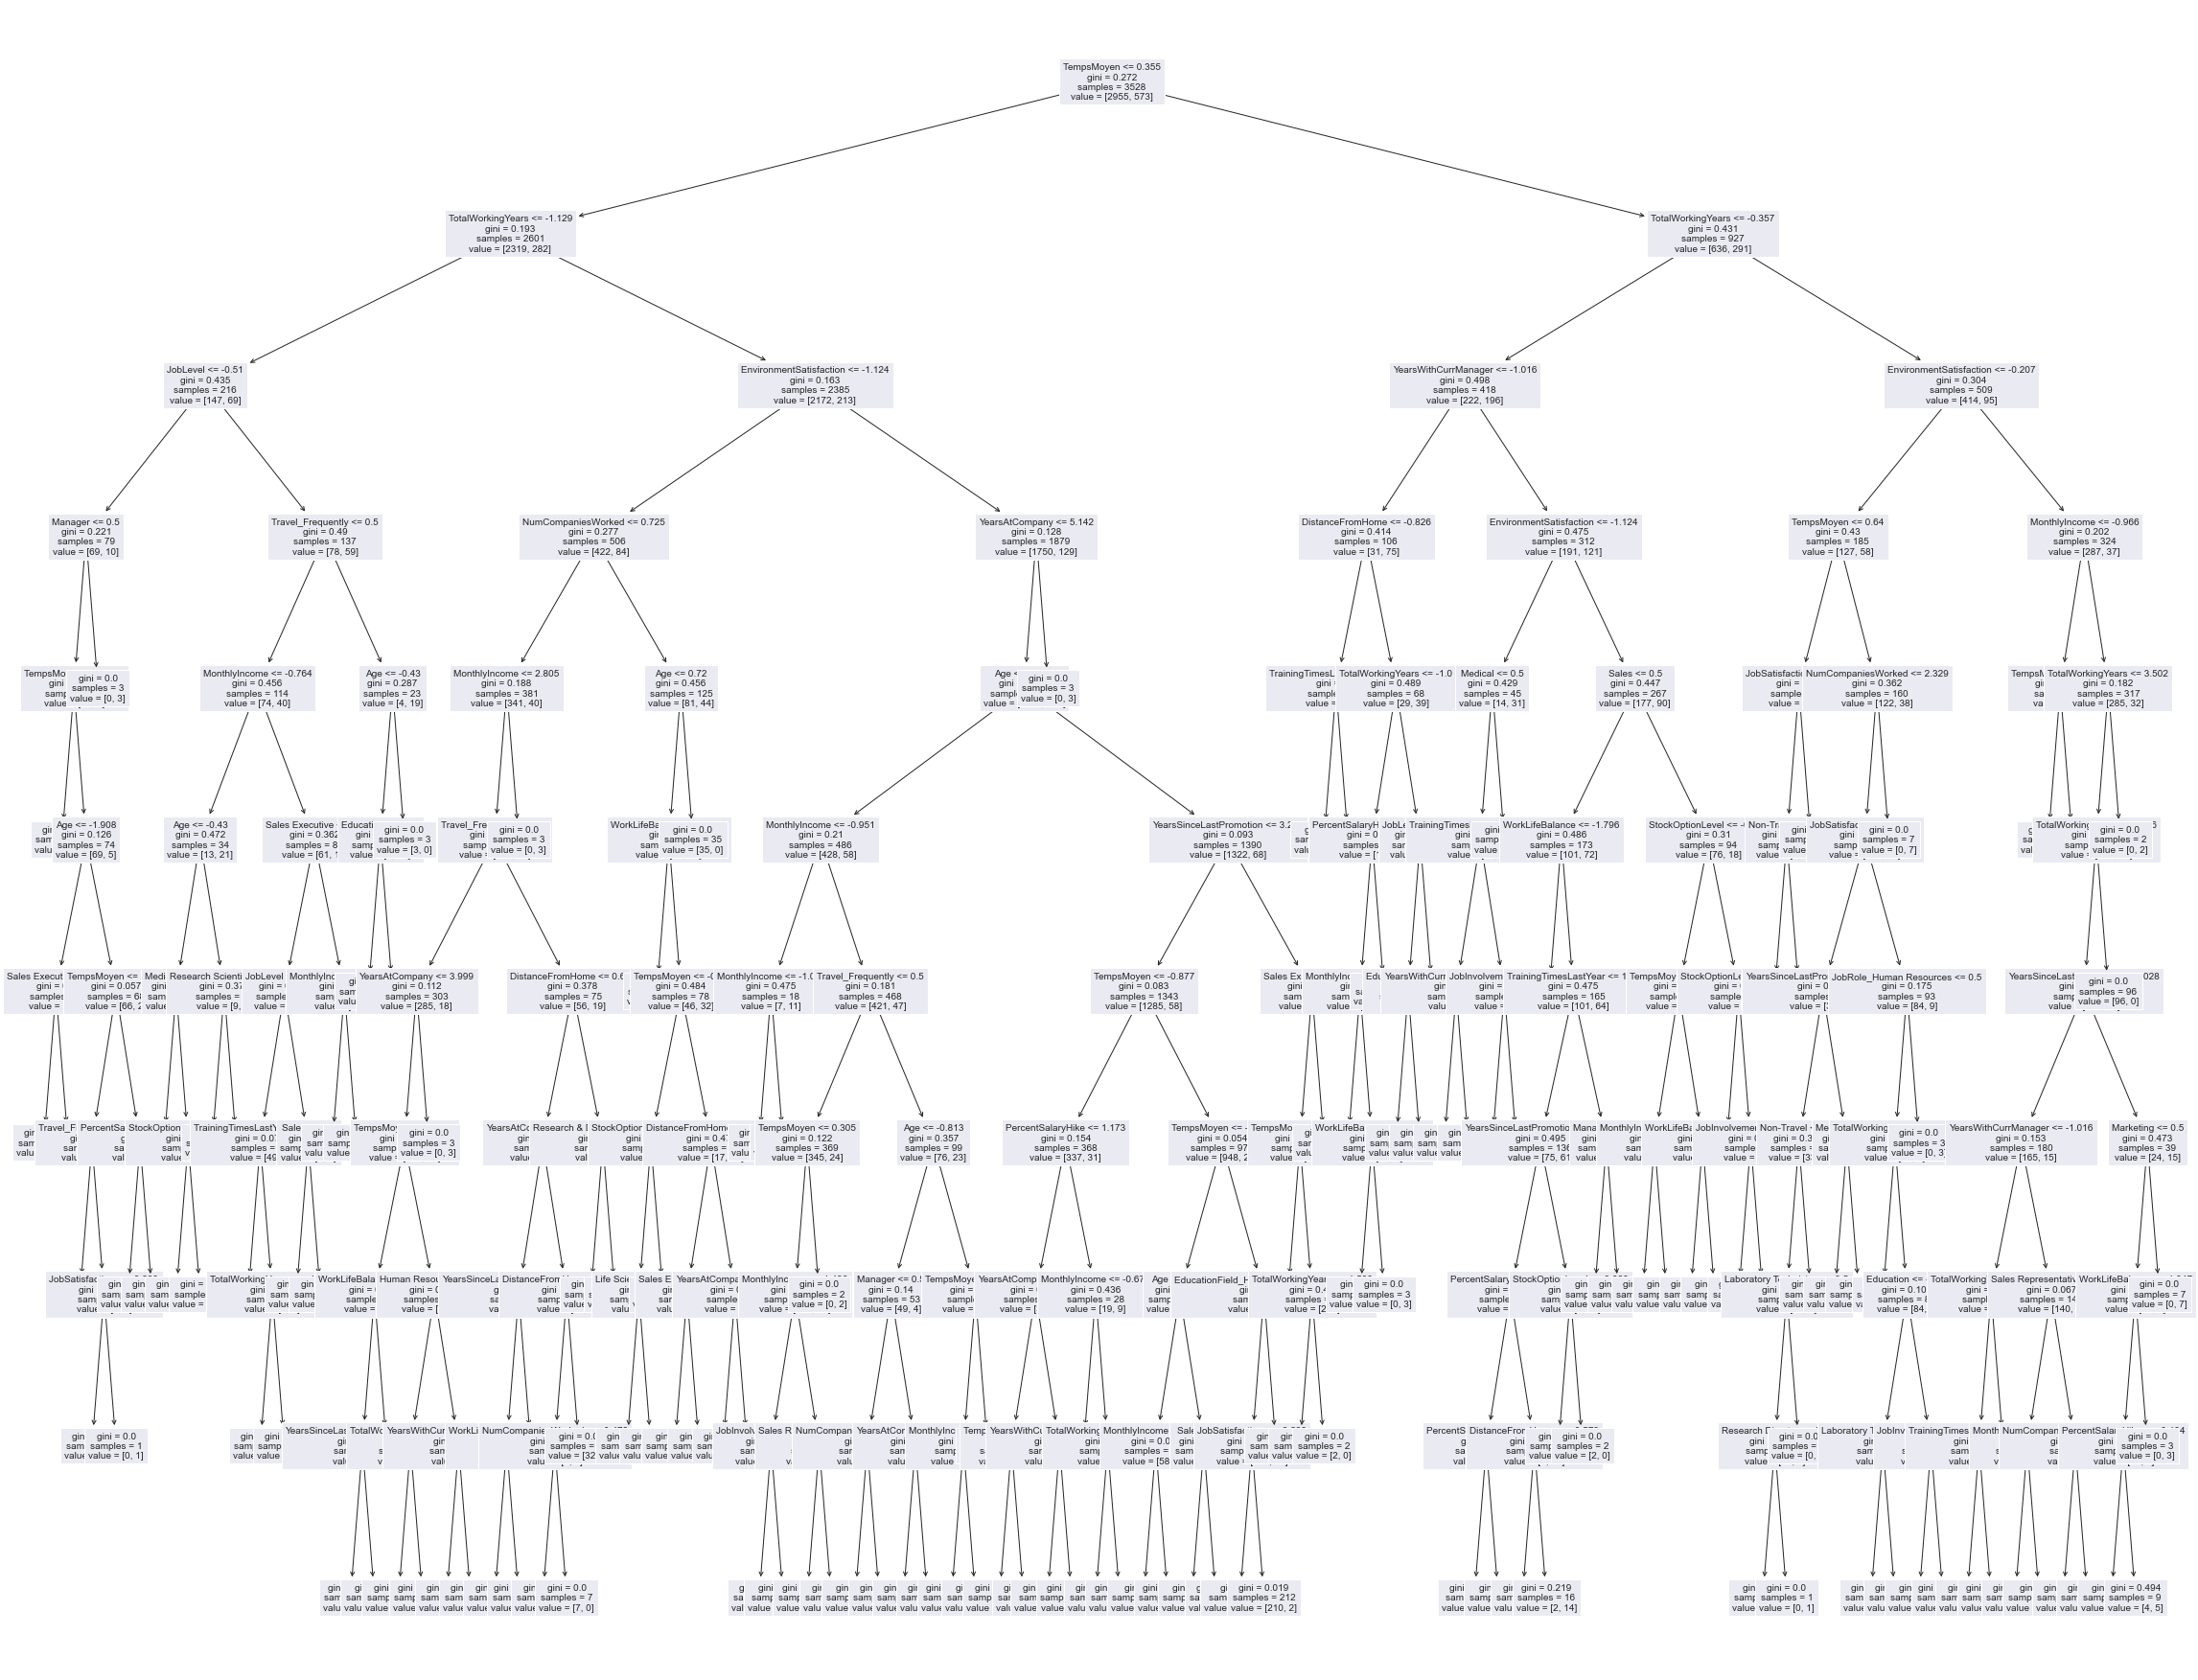

In [84]:
from sklearn import tree
plt.figure(figsize=(40,32))
tree.plot_tree(clf, feature_names= X_cleanedDataSet.columns,fontsize=10)

In [85]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = X_cleanedDataSet.columns, 
                     class_names="Attrition",
                     filled = True)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

y_scores_tree_clf = cross_val_predict(clf, X_cleanedDataSet, dataset_train_label_true, cv=7,
                                    method="predict")

In [87]:
precision_score(dataset_train_label_true, y_scores_tree_clf)


0.8854625550660793

In [88]:
recall_score(dataset_train_label_true, y_scores_tree_clf)

0.7015706806282722

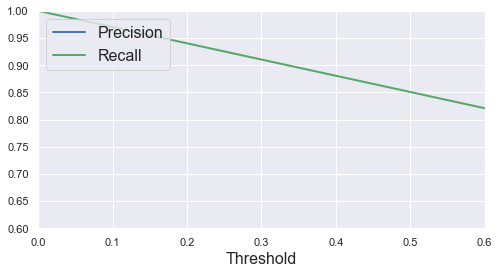

In [89]:
precisions, recalls, thresholds = precision_recall_curve(dataset_train_label_true, y_scores_tree_clf)

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 0.6])
plt.ylim([0.6, 1])
plt.show()

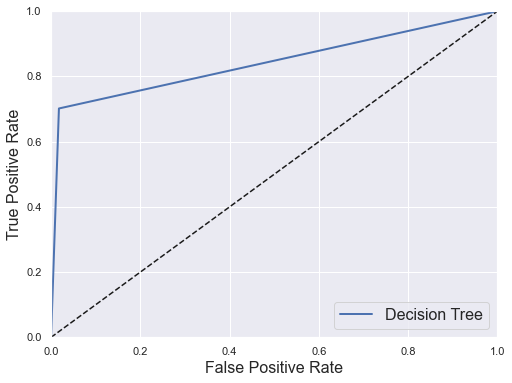

0.841986693952038

In [90]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(dataset_train_label_true, y_scores_tree_clf)
from sklearn.metrics import roc_auc_score
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plt.legend(loc="lower right", fontsize=16)
plt.show()

roc_auc_score(dataset_train_label_true, y_scores_tree_clf)

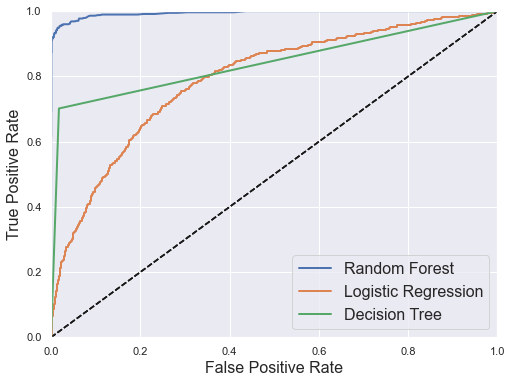

In [91]:
#Jeu de test 
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr, tpr, "Logistic Regression")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")

plt.legend(loc="lower right", fontsize=16)
plt.show()

Etant donné que le score du Random Forest est trop proche de 1, ce qui révèle un sur apprentissage et que l'AUC de la régression logistique est moins bien que celui de l'arbre de décision, nous avons décidé de garder le modèle de l'arbre de décision ayant un AUC correct sans être trop élevé.

Vérification du modèle avec le jeu de données

In [92]:
y_pred_test = clf.predict(X_cleanedTestDataSet)
y_pred_test.sum()/len(y_pred_test) * 100

12.585034013605442

On observe donc que notre modèle a prédit à partir de notre jeu de données test, un taux de départ de 12.5% ce qui est relativement proche des 15% prédit.

[Text(1126.384129213483, 1660.4509090909091, 'TempsMoyen <= 0.355\ngini = 0.272\nsamples = 3528\nvalue = [2955, 573]'),
 Text(499.0259831460674, 1502.3127272727272, 'TotalWorkingYears <= -1.129\ngini = 0.193\nsamples = 2601\nvalue = [2319, 282]'),
 Text(181.03651685393257, 1344.1745454545455, 'JobLevel <= -0.51\ngini = 0.435\nsamples = 216\nvalue = [147, 69]'),
 Text(56.42696629213483, 1186.0363636363636, 'Manager <= 0.5\ngini = 0.221\nsamples = 79\nvalue = [69, 10]'),
 Text(43.8876404494382, 1027.898181818182, 'TempsMoyen <= -1.236\ngini = 0.167\nsamples = 76\nvalue = [69, 7]'),
 Text(31.34831460674157, 869.76, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(56.42696629213483, 869.76, 'Age <= -1.908\ngini = 0.126\nsamples = 74\nvalue = [69, 5]'),
 Text(25.078651685393258, 711.6218181818183, 'Sales Executive <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(12.539325842696629, 553.4836363636364, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(37.61797752808989, 553.483636363

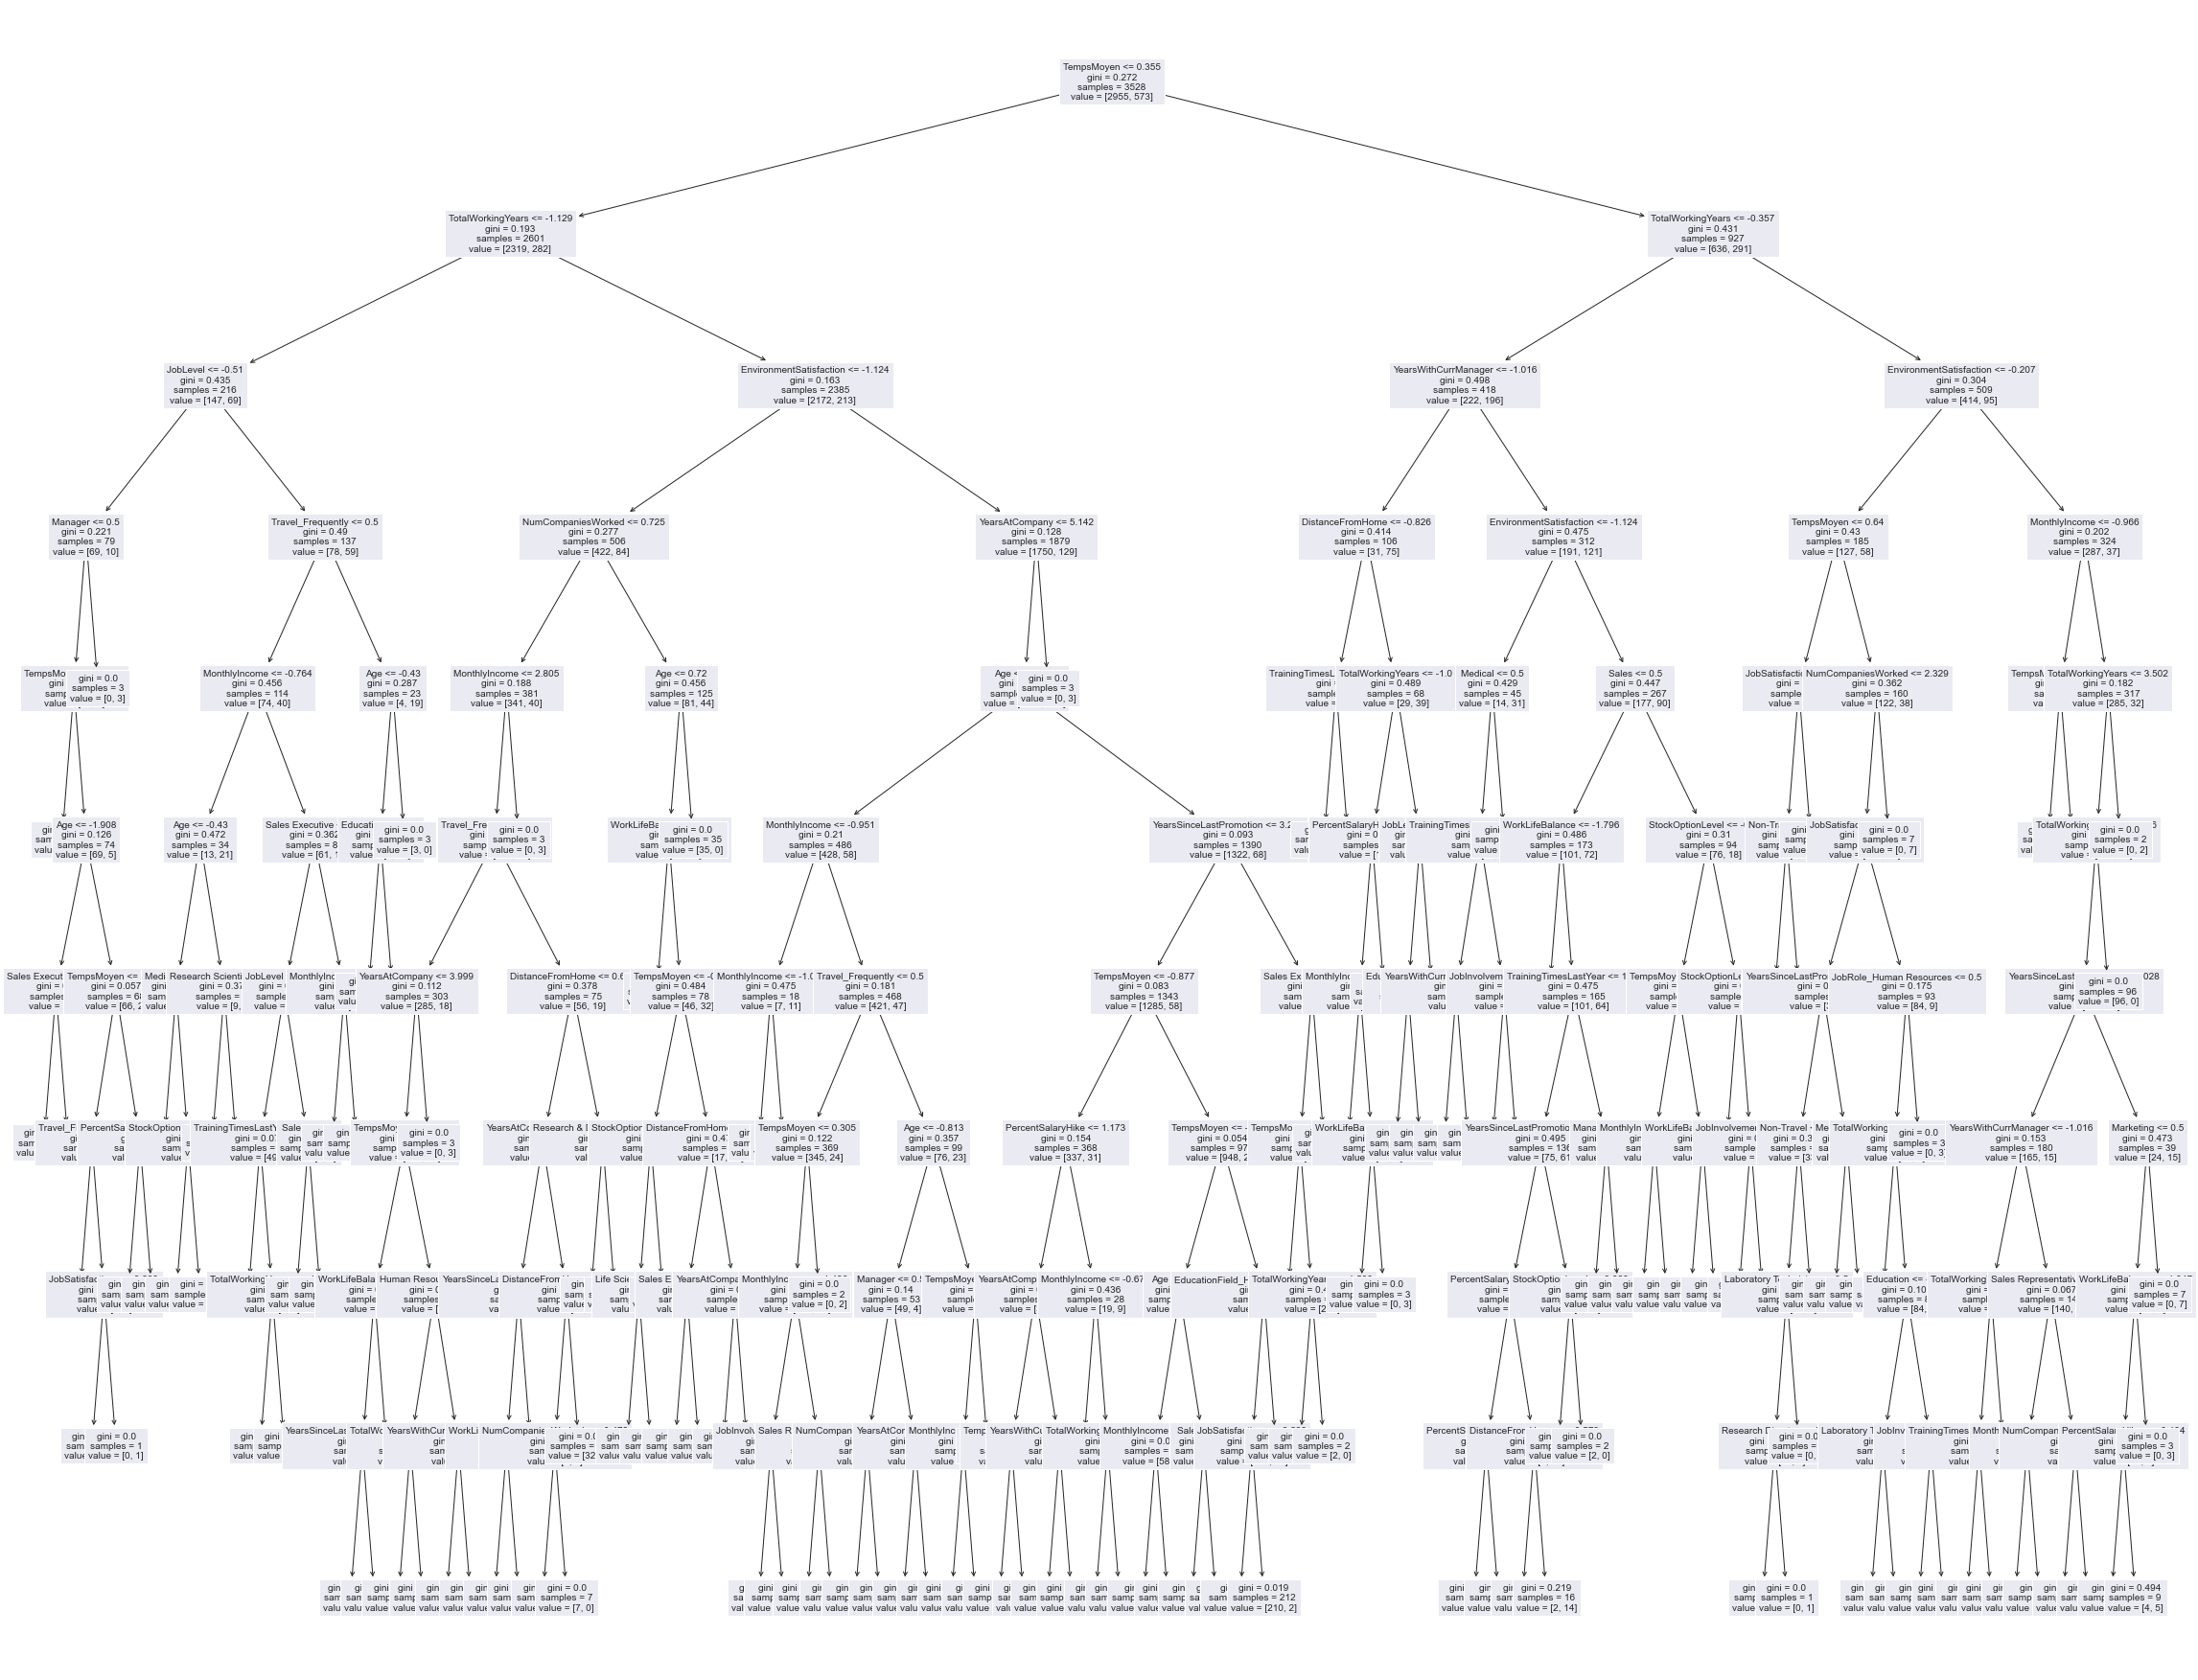

In [93]:
from sklearn import tree
plt.figure(figsize=(40,32))
tree.plot_tree(clf, feature_names= X_cleanedDataSet.columns,fontsize=10)

L'Arbre de décision révèle que l'attribut le plus déterminant est le temps passé au travail. Plus les personnes passent du temps au bureau, plus elles sont susceptibles de quitter l'entreprise. Ensuite, l'ancienneté dans l'entreprise est également significatif. Et enfin, la 3e et dernière variable plus importante est la satisfaction de l'environnement de travail

92.97052154195012

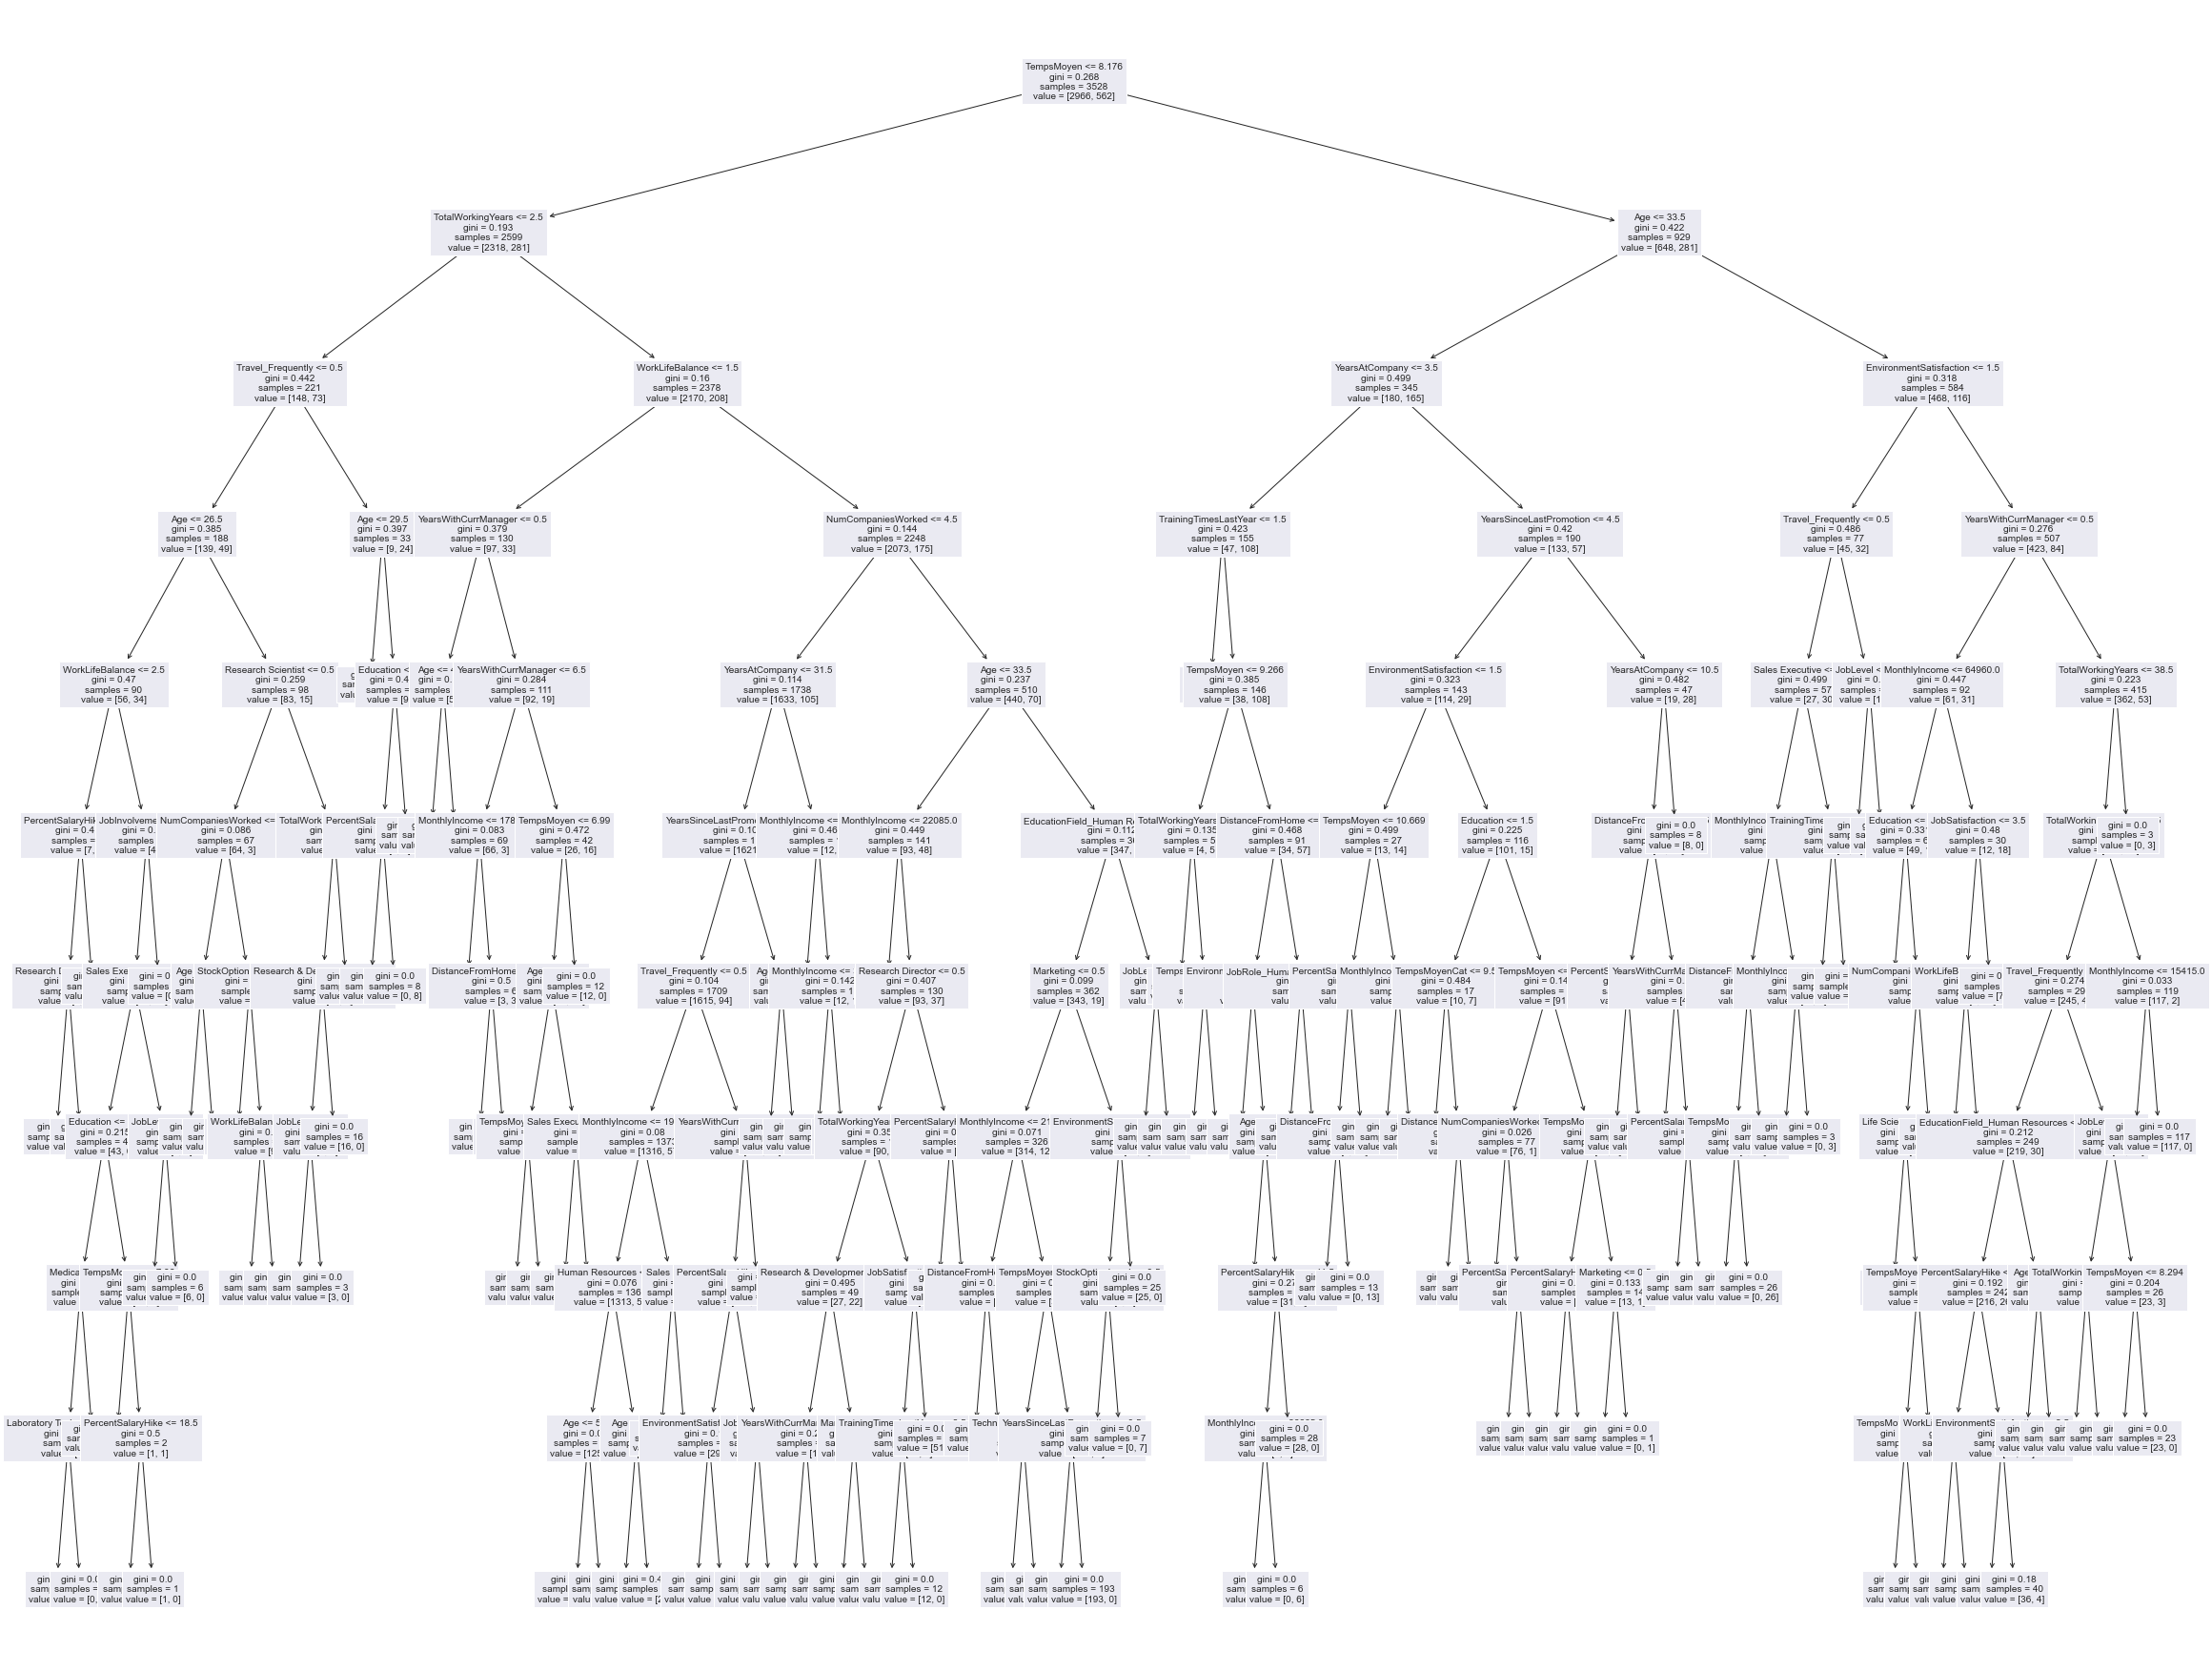

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median"))
    ])

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

dataset_num = totalDataSet.select_dtypes(include = [np.number])
num_attribs = list(dataset_num)
cat_attribs = ["BusinessTravel","Department","EducationField", "JobRole","MaritalStatus"]
bin_attribs = ["Attrition","Gender"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("cat_binary",OrdinalEncoder(),bin_attribs),
    ])

dataset_prepared = full_pipeline.fit_transform(totalDataSet)

dataframe_prepared = pd.DataFrame(dataset_prepared)
ordered_subcat = num_attribs.copy()
for cat in cat_attribs:
    for subcat in sorted(totalDataSet[cat].unique()):
        if subcat in ordered_subcat:
            ordered_subcat.append(cat + "_" + subcat)
        else:
            ordered_subcat.append(subcat)
for attrib in bin_attribs:
    ordered_subcat.append(attrib)

dataframe_prepared.columns = ordered_subcat
dataframe_prepared["TempsMoyenCat"] = np.ceil(dataframe_prepared["TempsMoyen"])

cleanedDataSet = dataframe_prepared.copy()
cleanedDataSet = cleanedDataSet.drop(['Gender','Divorced','Single','Married','SortieMoyenne','EntreeMoyenne'], axis=1)  #Ethique

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cleanedDataSet, cleanedDataSet["TempsMoyenCat"]):
    strat_train_set = cleanedDataSet.loc[train_index]
    strat_test_set = cleanedDataSet.loc[test_index]


X_cleanedDataSet = strat_train_set.drop(['Attrition'], axis=1) 
Y_cleanedDataSet = strat_train_set['Attrition'].copy()
Y_cleanedDataSet = Y_cleanedDataSet.replace({ 'No' : False, 'Yes' : True})


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10, random_state = 0)
clf.fit(X_cleanedDataSet, Y_cleanedDataSet)
clf.predict(X_cleanedDataSet)

from sklearn import tree
plt.figure(figsize=(40,32))
tree.plot_tree(clf, feature_names= X_cleanedDataSet.columns,fontsize=10)


y_pred_test = clf.predict(X_cleanedTestDataSet)
y_pred_test.sum()/len(y_pred_test) * 100